# Exploratory Data Analysis of Titanic Problem

## In this section we'll be doing th following things:
#### 1. Data Extraction
#### 2.Cleaning:
#### 3.Plotting:
#### 4.Assumptions:

## Import Important libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,model_selection
import xgboost as xgb
color=sns.color_palette()
%matplotlib inline

## Load the datasets

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print train.shape
print test.shape

(891, 12)
(418, 11)


### Lets have a look at the dataset

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived is the target variable.Other variables associated with datasets are:
1.PassengerId:The id of Each passenger
2.Pclass:Passenger Class
3.Name:Name of each Passenger
4.Sex:Sex of each passenger
5.Age:Age of each passenger
6.SibSp:sibling and spouse travelling with each passenger
7.Parch:Parents and children travelling with each passenger
8.Ticket:Ticket number of each passenger
Fare:Ticket Fare
Cabin:the cabin number
Embarked:The place of boarding the ship

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


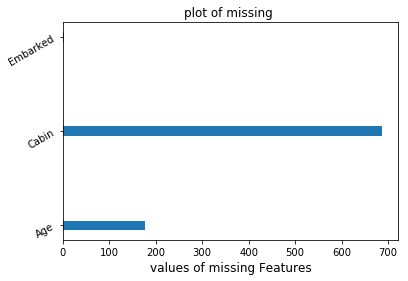

In [18]:
miss=train.isnull().sum().reset_index()
miss.columns=['Features','Missing']
miss=miss.loc[miss['Missing']>0]

count=np.arange(miss.shape[0])
width=0.1
fig,ax=plt.subplots(figsize=(6,4))
plt.barh(count,miss.Missing.values,width)
ax.set_yticks(count)
ax.set_yticklabels(miss.Features.values,rotation=30)
ax.set_xlabel('values of missing Features',fontsize=12)
plt.title('plot of missing ')
plt.show()


Lets fill Age with median of Age and then visualize the data

In [21]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [22]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Lets visualize the data

### Lets visualize the survival based on Gender

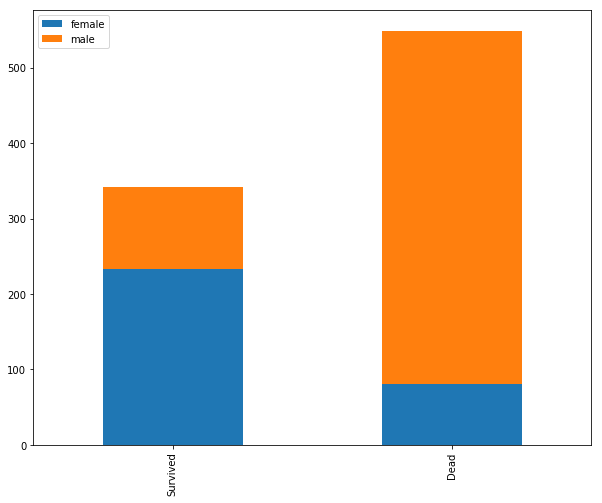

In [34]:
survived=train[train['Survived']==1]['Sex'].value_counts()
dead=train[train['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',stacked=True,figsize=(10,8))

It seems like women got more chance of survival.

### Now visualize the survival based on Age.

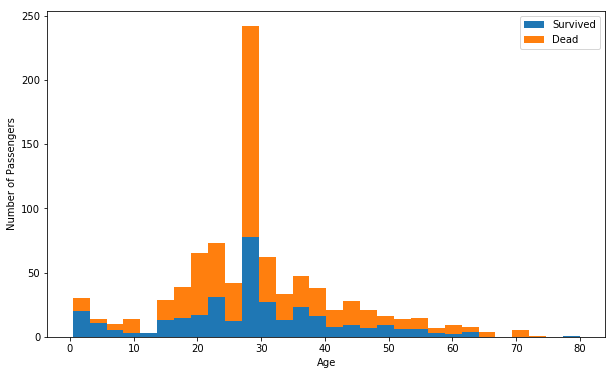

In [41]:
fig=plt.figure(figsize=(10,6))
plt.hist([train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],stacked='True',bins=30,label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

### Now visualize the survival based on Fare

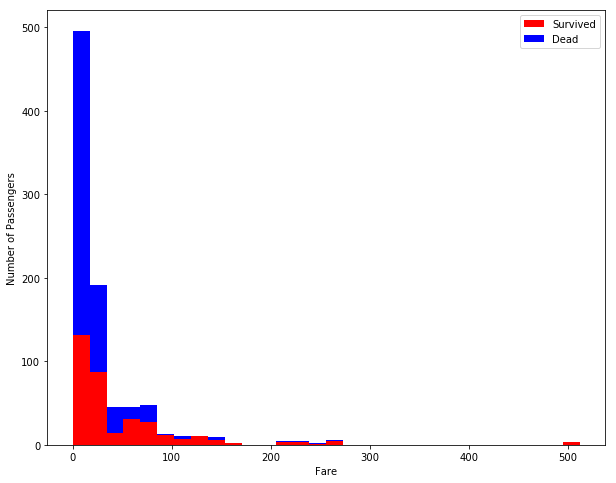

In [44]:
fig=plt.figure(figsize=(10,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],stacked=True,color=['r','b'],
        bins=30,label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

Seems like passengers with high ticket fare are more likely to be rescued.

### Now visualize survival based on Passenger class

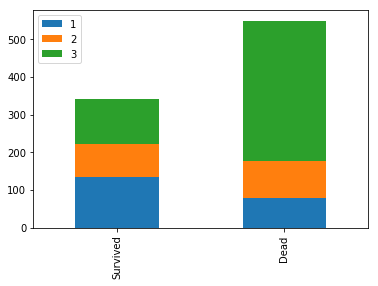

In [49]:
survived=train[train['Survived']==1]['Pclass'].value_counts()
dead=train[train['Survived']==0]['Pclass'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',stacked=True)

As we can see class 3 people are more likely to die.

### Survival w.r.t Parch

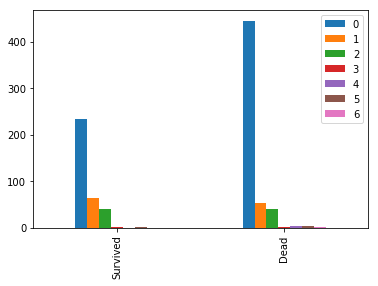

In [71]:
survived=train[train['Survived']==1]['Parch'].value_counts()
dead=train[train['Survived']==0]['Parch'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',figsize=)

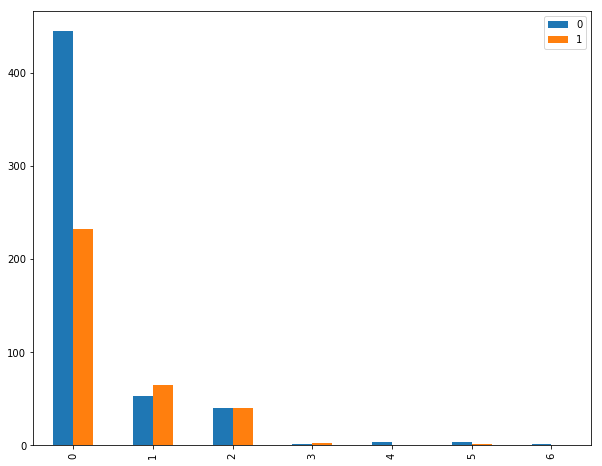

In [78]:
survived1=train[train['Parch']==0]['Survived'].value_counts()
survived2=train[train['Parch']==1]['Survived'].value_counts()
survived3=train[train['Parch']==2]['Survived'].value_counts()
survived4=train[train['Parch']==3]['Survived'].value_counts()
survived5=train[train['Parch']==4]['Survived'].value_counts()
survived6=train[train['Parch']==5]['Survived'].value_counts()
survived7=train[train['Parch']==6]['Survived'].value_counts()

df=pd.DataFrame([survived1,survived2,survived3,survived4,survived5,survived6,survived7])
df.index=['0','1','2','3','4','5','6']
df.plot(kind='bar',legend=['Dead','Survived'],figsize=(10,8))
plt.legend()

### Survival w.r.t Sibsp

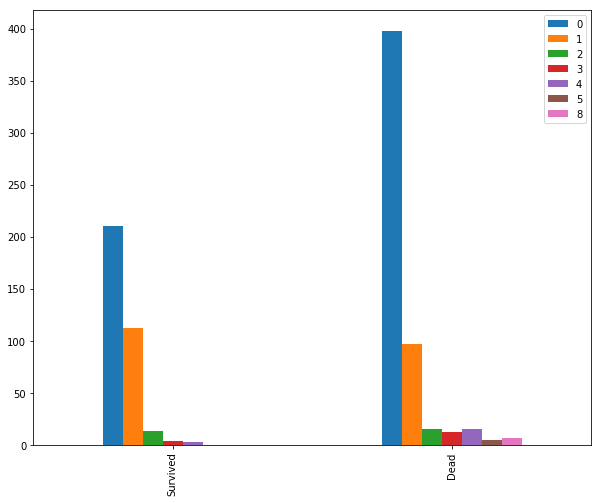

In [82]:
survived=train[train['Survived']==1]['SibSp'].value_counts()
dead=train[train['Survived']==0]['SibSp'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',figsize=(10,8))

### Lets See the impact of Embarkation on Survival

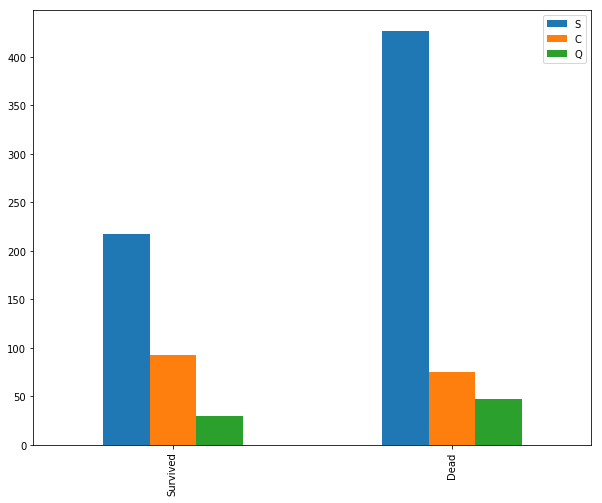

In [83]:
survived=train[train['Survived']==1]['Embarked'].value_counts()
dead=train[train['Survived']==0]['Embarked'].value_counts()
df=pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df.plot(kind='bar',figsize=(10,8))

## Now Lets see the important Features

In [84]:
#Step 1 is to convert the categorical variables
for f in train.columns:
    if train[f].dtype=='object':
        lbl=preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f]=lbl.transform(list(train[f].values))

In [85]:
#Step 2: Separate the target variable from train
train_y=train.Survived.values
train_x=train.drop(['PassengerId','Survived'],axis=1)

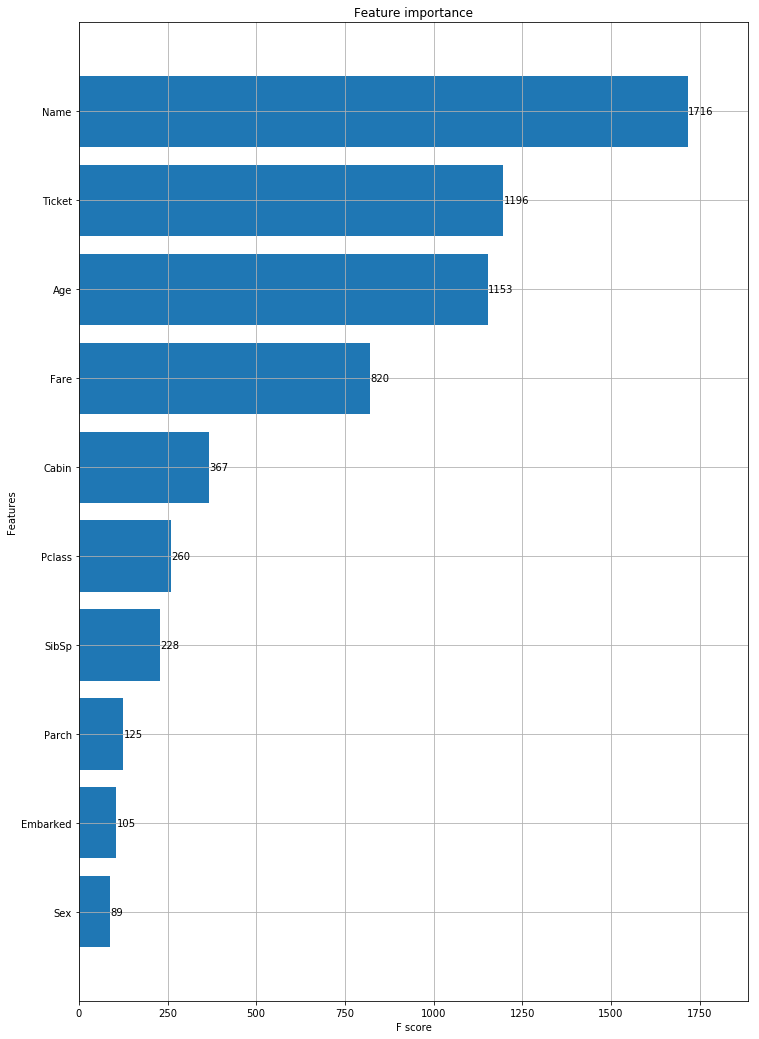

In [87]:
#Step 3 Prepare the xgboost params,dtrain and model
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain=xgb.DMatrix(train_x,train_y,feature_names=train_x.columns.values)
model=xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)
fig,ax=plt.subplots(figsize=(12,18))
xgb.plot_importance(model,max_num_features=50,height=0.8,ax=ax)
plt.show()